# **YouTube Movies Analysis**

In [80]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('movies_youtube_sentiments.csv')
df.head()

,name,trailer_link,video_id,sentiment_scores,favorability,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime
0,Harry Potter and the Goblet of Fire,https://www.youtube.com/watch?v=3EGojp4Hh6I,3EGojp4Hh6I,"{'positive': 87, 'neutral': 112, 'negative': 51}",0.630435,PG-13,Adventure,2005,"November 18, 2005 (United States)",566000.0,Mike Newell,Steve Kloves,Daniel Radcliffe,United Kingdom,150000000.0,896678241.0,Warner Bros.,157.0
1,The 40-Year-Old Virgin,https://www.youtube.com/watch?v=YnDeJn-BX5Q,YnDeJn-BX5Q,"{'positive': 40, 'neutral': 45, 'negative': 18}",0.689655,R,Comedy,2005,"August 19, 2005 (United States)",407000.0,Judd Apatow,Judd Apatow,Steve Carell,United States,26000000.0,177378645.0,Universal Pictures,116.0
2,Memoirs of a Geisha,https://www.youtube.com/watch?v=4L-xlmakQvc,4L-xlmakQvc,"{'positive': 120, 'neutral': 89, 'negative': 41}",0.745342,PG-13,Drama,2005,"December 23, 2005 (United States)",141000.0,Rob Marshall,Robin Swicord,Ziyi Zhang,France,85000000.0,162242962.0,Columbia Pictures,145.0
3,Pride & Prejudice,https://www.youtube.com/watch?v=Ur_DIHs92NM,Ur_DIHs92NM,"{'positive': 93, 'neutral': 98, 'negative': 19}",0.830357,PG,Drama,2005,"November 23, 2005 (United States)",269000.0,Joe Wright,Deborah Moggach,Keira Knightley,France,28000000.0,121616555.0,Focus Features,129.0
4,Batman Begins,https://www.youtube.com/watch?v=neY2xVmOfUM,neY2xVmOfUM,"{'positive': 128, 'neutral': 97, 'negative': 25}",0.836601,PG-13,Action,2005,"June 15, 2005 (United States)",1300000.0,Christopher Nolan,Bob Kane,Christian Bale,United Kingdom,150000000.0,373661946.0,Warner Bros.,140.0


## **1. Basic Information:**

### What are the columns in the dataset?

In [82]:
df.columns

Index(['name', 'trailer_link', 'video_id', 'sentiment_scores', 'favorability',
       'rating', 'genre', 'year', 'released', 'votes', 'director', 'writer',
       'star', 'country', 'budget', 'gross', 'company', 'runtime'],
      dtype='object')

### How many rows are there in the dataset?

In [83]:
print('Total rows in dataset are',df.shape[0])

Total rows in dataset are 1105


### What is the datatype of each column?

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1105 non-null   object 
 1   trailer_link      1105 non-null   object 
 2   video_id          1105 non-null   object 
 3   sentiment_scores  1105 non-null   object 
 4   favorability      1105 non-null   float64
 5   rating            1104 non-null   object 
 6   genre             1105 non-null   object 
 7   year              1105 non-null   int64  
 8   released          1105 non-null   object 
 9   votes             1105 non-null   float64
 10  director          1105 non-null   object 
 11  writer            1104 non-null   object 
 12  star              1105 non-null   object 
 13  country           1105 non-null   object 
 14  budget            901 non-null    float64
 15  gross             1105 non-null   float64
 16  company           1105 non-null   object 


## **2. Data Cleaning:**

### Are there any missing values in the dataset? If so, how are they distributed across columns?

In [85]:
df.isnull().sum()

name                  0
trailer_link          0
video_id              0
sentiment_scores      0
favorability          0
rating                1
genre                 0
year                  0
released              0
votes                 0
director              0
writer                1
star                  0
country               0
budget              204
gross                 0
company               0
runtime               1
dtype: int64

### Are there any duplicate rows in the dataset?

In [86]:
df[df.duplicated()]

,name,trailer_link,video_id,sentiment_scores,favorability,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime
407,The Girl with the Dragon Tattoo,https://www.youtube.com/watch?v=DqQe3OrsMKI,DqQe3OrsMKI,"{'positive': 133, 'neutral': 70, 'negative': 47}",0.738889,R,Crime,2009,"April 30, 2010 (United States)",211000.0,Niels Arden Oplev,Nikolaj Arcel,Michael Nyqvist,Sweden,13000000.0,104414200.0,Yellow Bird,152.0
408,The Girl with the Dragon Tattoo,https://www.youtube.com/watch?v=DqQe3OrsMKI,DqQe3OrsMKI,"{'positive': 133, 'neutral': 70, 'negative': 47}",0.738889,R,Crime,2011,"December 21, 2011 (United States)",435000.0,David Fincher,Steven Zaillian,Daniel Craig,United States,90000000.0,232617430.0,Columbia Pictures,158.0


## **3. Data Understanding:**

### What is the distribution of movies across different genres?

In [87]:
pd.DataFrame(df.groupby('genre'))[0]

0        Action
1     Adventure
2     Animation
3     Biography
4        Comedy
5         Crime
6         Drama
7       Fantasy
8        Horror
9       Mystery
10      Romance
11       Sci-Fi
12     Thriller
Name: 0, dtype: object

### How many unique directors, writers, and stars are there in the dataset?

In [88]:
pd.DataFrame(df.groupby('director'))[0]

0          Aaron Sorkin
1             Abby Kohn
2           Adam Brooks
3            Adam McKay
4           Adam Rifkin
             ...       
767         Xavier Gens
768        Yong-hwa Kim
769    Yorgos Lanthimos
770         Zack Snyder
771      Zal Batmanglij
Name: 0, Length: 772, dtype: object

In [89]:
pd.DataFrame(df.groupby('writer'))[0]

0      Aaron Guzikowski
1          Aaron Sorkin
2             Abby Kohn
3         Abdi Nazemian
4      Adam 'Tex' Davis
             ...       
879         Zack Snyder
880      Zal Batmanglij
881           Zoe Kazan
882         Àlex Pastor
883          Émile Zola
Name: 0, Length: 884, dtype: object

In [90]:
pd.DataFrame(df.groupby('star'))[0]

0                Aamir Khan
1             Aaron Eckhart
2            Aaron Moorhead
3                Aaron Paul
4      Aaron Taylor-Johnson
               ...         
664              Zach Braff
665          Zachary Quinto
666              Ziyi Zhang
667             Zoe Saldana
668             Zoey Deutch
Name: 0, Length: 669, dtype: object

### What is the distribution of sentiment scores (positive, neutral, negative)?

In [91]:
import ast

def convert_to_dict(text):
    return ast.literal_eval(text)

df['sentiment_scores'] = df['sentiment_scores'].apply(convert_to_dict)

def extract_sentiment_counts(row):
    return row['positive'], row['negative'], row['neutral']

df[['positive_count', 'negative_count', 'neutral_count']] = df['sentiment_scores'].apply(extract_sentiment_counts).apply(pd.Series)

total_positive = df['positive_count'].sum()
total_negative = df['negative_count'].sum()
total_neutral = df['neutral_count'].sum()

print("Total Positive:", total_positive)
print("Total Negative:", total_negative)
print("Total Neutral:", total_neutral)

Total Positive: 87153
Total Negative: 42413
Total Neutral: 76248


### What is the distribution of favorability scores?

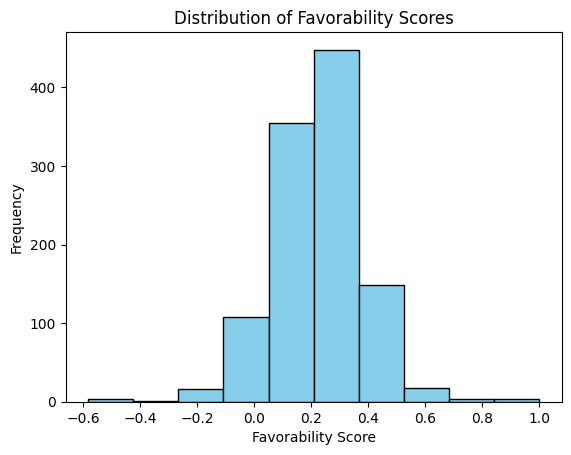

In [92]:
def calculate_favorability_score(row):
    total_count = sum(row.values())
    return (row['positive'] - row['negative']) / total_count if total_count > 0 else 0

df['favorability'] = df['sentiment_scores'].apply(calculate_favorability_score)

df['favorability'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Favorability Score')
plt.ylabel('Frequency')
plt.title('Distribution of Favorability Scores')

plt.show()

### How are sentiment scores correlated with favorability scores?

In [93]:
df['sentiment_scores_sum'] = df['sentiment_scores'].apply(lambda x: sum(x.values()))

correlation = df['sentiment_scores_sum'].corr(df['favorability'])

print("Correlation between sentiment_scores and favorability:", correlation)

Correlation between sentiment_scores and favorability: -0.1104094175492758


## **4. Exploratory Visualization:**

### Plot a histogram of sentiment scores.

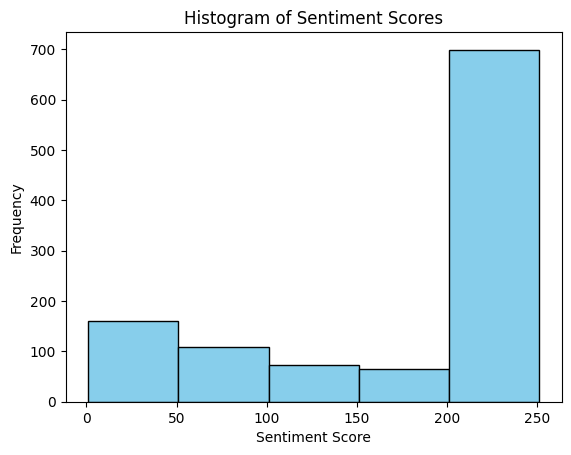

In [94]:
df['sentiment_scores'] = df['sentiment_scores'].apply(lambda x: sum(x.values()))

plt.hist(df['sentiment_scores'], bins=5, color='skyblue', edgecolor='black')

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Scores')

plt.show()

### Plot a bar chart showing the number of movies released each year.

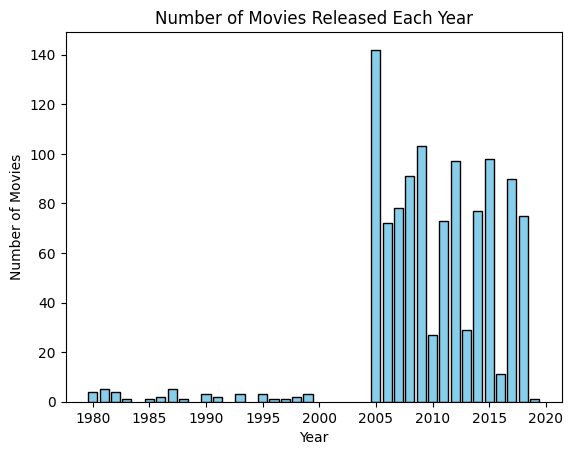

In [98]:
movies_per_year = df['year'].value_counts().sort_index()

plt.bar(movies_per_year.index, movies_per_year.values, color='skyblue', edgecolor='black')

plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')
plt.show()

### Visualize the distribution of favorability scores using a box plot

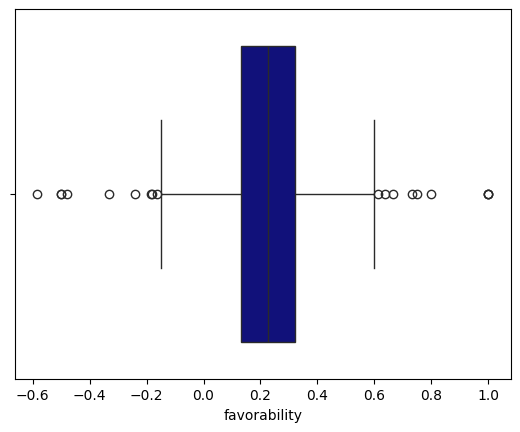

In [104]:
sns.boxplot(df['favorability'],orient='y',color='darkblue')
plt.show()

### Plot a scatter plot showing the relationship between budget and gross revenue.

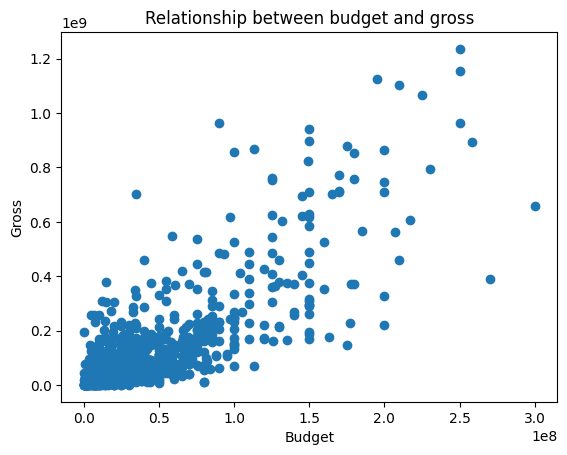

In [108]:
plt.scatter(df['budget'],df['gross'])
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Relationship between budget and gross')
plt.show()

## **5. Advanced Analysis:**

### Is there a correlation between sentiment scores and box office performance (e.g., gross revenue)?

In [115]:
def aggregate_sentiment_score(score):
    if isinstance(score, dict):
        return score.get('positive', 0) - score.get('negative', 0)
    else:
        return 0
df['aggregated_sentiment_score'] = df['sentiment_scores'].apply(aggregate_sentiment_score)

correlation = df['aggregated_sentiment_score'].corr(df['gross'])

print("Correlation between aggregated sentiment scores and box office performance:", correlation)

Correlation between aggregated sentiment scores and box office performance: nan


### Are certain genres more likely to receive positive sentiment scores?

In [127]:
def aggregate_sentiment_score(score):
    if isinstance(score, dict):
        return score.get('positive', 0) - score.get('negative', 0)
    else:
        return 0

df['aggregated_sentiment_score'] = df['sentiment_scores'].apply(aggregate_sentiment_score)

genre_sentiment_avg = df.groupby('genre')['aggregated_sentiment_score'].mean()

print("Average sentiment score by genre:")
print(genre_sentiment_avg)

Average sentiment score by genre:
genre
Action       0.0
Adventure    0.0
Animation    0.0
Biography    0.0
Comedy       0.0
Crime        0.0
Drama        0.0
Fantasy      0.0
Horror       0.0
Mystery      0.0
Romance      0.0
Sci-Fi       0.0
Thriller     0.0
Name: aggregated_sentiment_score, dtype: float64


### Are movies with higher budgets more likely to have positive sentiment scores?

In [132]:
def aggregate_sentiment_score(score):
    if isinstance(score, dict):
        return score.get('positive', 0) - score.get('negative', 0)
    else:
        return None

df['aggregated_sentiment_score'] = df['sentiment_scores'].apply(aggregate_sentiment_score)

df_filtered = df.dropna(subset=['aggregated_sentiment_score'])

correlation = df_filtered['budget'].corr(df_filtered['aggregated_sentiment_score'])

print("Correlation between budget and sentiment score:", correlation)

Correlation between budget and sentiment score: nan
